# Importing all requried libraries

In [1]:

 from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import zipfile
import os

# Unzipping the archive.zip file
with zipfile.ZipFile('/content/drive/MyDrive/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('extracted_data')

# List the contents of the extracted_data directory to see what files we have
extracted_files = os.listdir('extracted_data')
print(extracted_files)

['train', 'test']


In [3]:
import os

# List the contents of the train and test directories
train_files = os.listdir('extracted_data/train')
test_files = os.listdir('extracted_data/test')

print('Train files:', train_files)
print('Test files:', test_files)

Train files: ['surprise', 'sad', 'disgust', 'angry', 'happy', 'fear', 'neutral']
Test files: ['surprise', 'sad', 'disgust', 'angry', 'happy', 'fear', 'neutral']


In [4]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.15.0


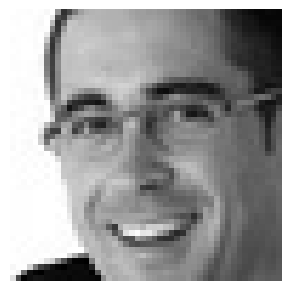

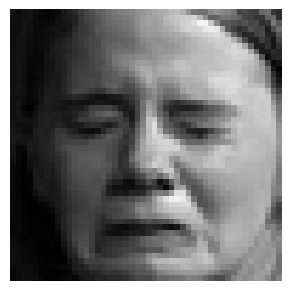

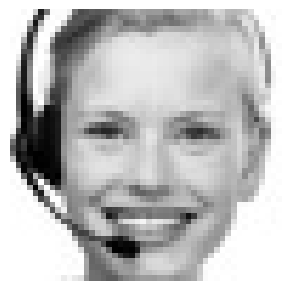

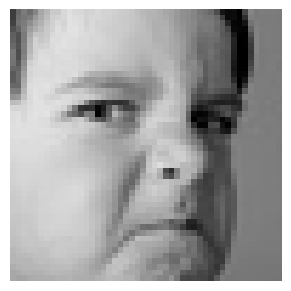

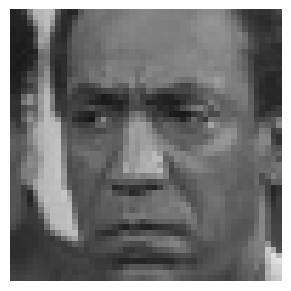

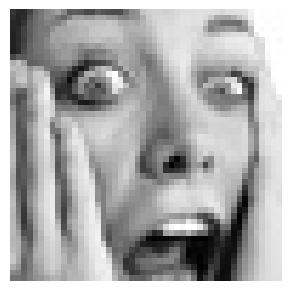

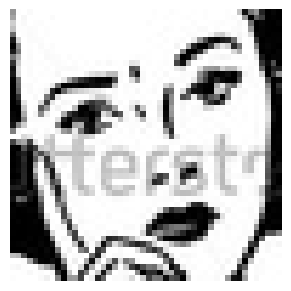

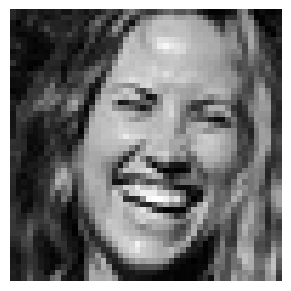

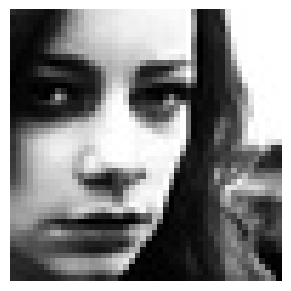

In [5]:
images = glob("/content/extracted_data/train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

In [6]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator(horizontal_flip = True)
train_generator = datagen_train.flow_from_directory("/content/extracted_data/train",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator(horizontal_flip = True)
validation_generator = datagen_train.flow_from_directory("/content/extracted_data/test",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)

    return x

In [8]:
from keras.layers import Dense

In [9]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Conv2D(64,(3,3), activation='relu')(inputs)
    conv_2 = Conv2D(128,(5,5), activation='relu')(conv_1)
    conv_3 = Conv2D(512,(3,3), activation='relu')(conv_2)
    conv_4 = Conv2D(512,(3,3), activation='relu')(conv_3)

    flatten = Flatten()(conv_4)

    codedense_1 = Dense(256,activation='relu')(flatten)
    codedense_2 = Dense(512, activation='relu')(codedense_1)

    output  = Dense(7, activation="softmax")(codedense_2)
    model  =  Model(inputs=[inputs],outputs = [output])

    opt = Adam(learning_rate=0.0005)

    model.compile(loss='categorical_crossentropy', optimizer = opt, metrics =["accuracy"])

    return model


In [10]:
model = model_fer((48,48,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 128)       204928    
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 512)       590336    
                                                                 
 conv2d_3 (Conv2D)           (None, 38, 38, 512)       2359808   
                                                                 
 flatten (Flatten)           (None, 739328)            0         
                                                                 
 dense (Dense)               (None, 256)               189268

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'ax', verbose =1)
reduce_lr  = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.0001)
callbacks = [checkpoint, reduce_lr]

In [12]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 4.2788 - accuracy: 0.2461
Epoch 1: saving model to model_weights.weights.h5
448/448 [==============================] - 158s 313ms/step - loss: 4.2788 - accuracy: 0.2461 - val_loss: 1.8142 - val_accuracy: 0.2472 - lr: 5.0000e-04
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.8106 - accuracy: 0.2512
Epoch 2: saving model to model_weights.weights.h5
448/448 [==============================] - 136s 302ms/step - loss: 1.8106 - accuracy: 0.2512 - val_loss: 1.8134 - val_accuracy: 0.2471 - lr: 5.0000e-04
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.8108 - accuracy: 0.2512
Epoch 3: saving model to model_weights.weights.h5
448/448 [==============================] - 126s 282ms/step - loss: 1.8108 - accuracy: 0.2512 - val_loss: 1.8138 - val_accuracy: 0.2473 - lr: 5.0000e-04
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.8104 - accuracy: 0.2515
Epoch 4: s

In [13]:
model.evaluate(validation_generator)

113/113 [==============================] - 9s 77ms/step - loss: 1.8133 - accuracy: 0.2471


[1.8133060932159424, 0.24714405834674835]

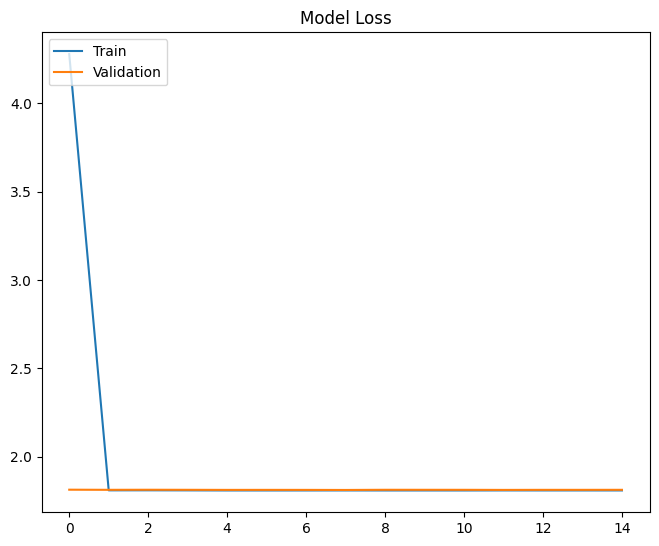

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

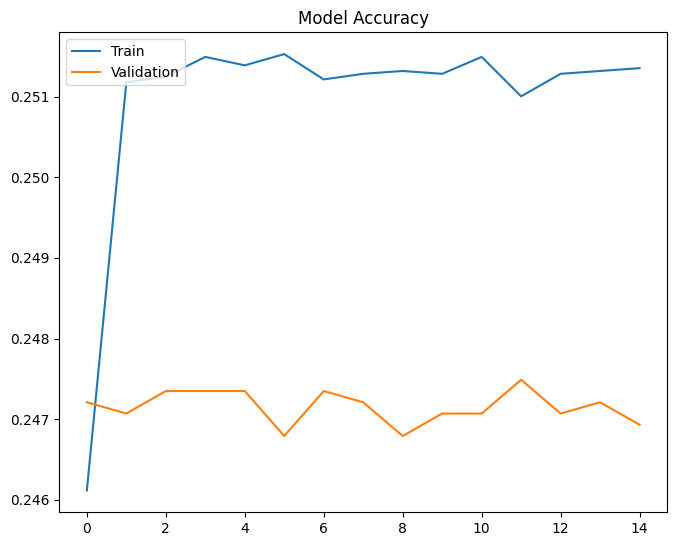

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [17]:
model_json = model.to_json()
with open("model_a1.json","w") as json_file:
    json_file.write(model_json)